<a href="https://colab.research.google.com/github/ItsSHALINISuresh/ML-in-Business/blob/main/Assessment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 2

**Student Name:** SHALINI SURESH

**Student ID:** S223019007

<a id = "cell_exploration"></a>
# 2. Data understanding, preparation, explorations and visualisation


## 2.1 Import the Libraries

In [1]:
# Load libraries for data manipulation,analysis and for calculation with arrays
import pandas as pd
import numpy as np

#Load libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## 2.2 Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
data_set = pd.read_csv('/content/drive/MyDrive/FoodieBay.csv')

# Explore the dataset
print(data_set)

print('Sample size:', data_set.shape[0])
print('Number of columns:', data_set.shape[1])

                                                     url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South

In [4]:
# Prints data type of all the columns
print(data_set.info())
print(data_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

## QUESTION-1

In [5]:
# 1. To Identify no.of restaurants with table booking and what are the impacts of them on ratings?
table_bookings = data_set[data_set['book_table'] == 'Yes']
avg_rating_table_bookings = table_bookings['rate'].mean()
avg_overall_ratings = data_set['rate'].mean()
impact_table_bookings = avg_rating_table_bookings - avg_overall_ratings
print(f"Number of restaurants offering table booking: {len(table_bookings)}")
print(f"Impact of table booking on ratings: {impact_table_bookings:.2f}")

Number of restaurants offering table booking: 4094
Impact of table booking on ratings: 0.45


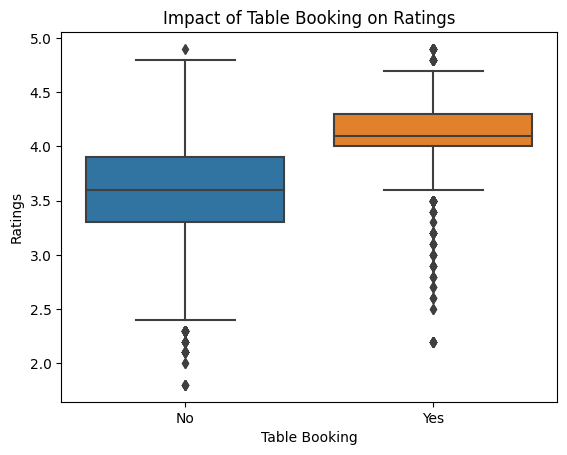

In [6]:
#Represenation of impact
sns.boxplot(x='book_table', y='rate', data=data_set)
plt.xlabel('Table Booking')
plt.ylabel('Ratings')
plt.title('Impact of Table Booking on Ratings')
plt.show()

## QUESTION-2

In [7]:
# 2. To Identify no.of restaurants which offer online ordering and How does this influence on ratings?
order_online = data_set[data_set['online_order'] == 'Yes']
avg_ratings_order_online = order_online['rate'].mean()
influence_order_online = avg_ratings_order_online - avg_overall_ratings
print(f"Number of restaurants offering online ordering: {len(order_online)}")
print(f"Impact of online ordering on ratings: {influence_order_online:.2f}")


Number of restaurants offering online ordering: 24559
Impact of online ordering on ratings: 0.04


Text(0.5, 1.0, 'Distribution of Ratings by Online Ordering')

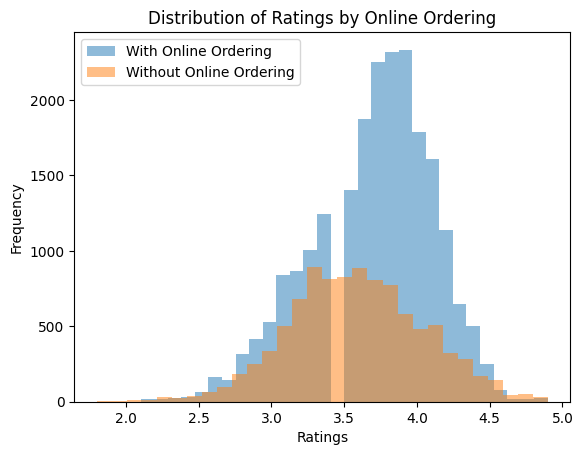

In [8]:
#Representation of Influence
plt.hist(data_set[data_set['online_order'] == 'Yes']['rate'], bins=30, alpha=0.5, label='With Online Ordering')

# Plot histograms for ratings without online ordering
plt.hist(data_set[data_set['online_order'] == 'No']['rate'], bins=30, alpha=0.5, label='Without Online Ordering')

# Add labels and a legend
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()

# Add a title
plt.title('Distribution of Ratings by Online Ordering')


## QUESTION-3

In [9]:
# 3. To find the impact of average cost of two and average customer review ranking on ratings?
correlation = data_set['ave_cost_for_two'].corr(data_set['rate'])
print(f"Correlation of average cost of two and rate: {correlation:.2f}")
correlation = data_set['ave_review_ranking'].corr(data_set['rate'])
print(f"Correlation of average review ranking and rate: {correlation:.2f}")

Correlation of average cost of two and rate: 0.39
Correlation of average review ranking and rate: 0.48


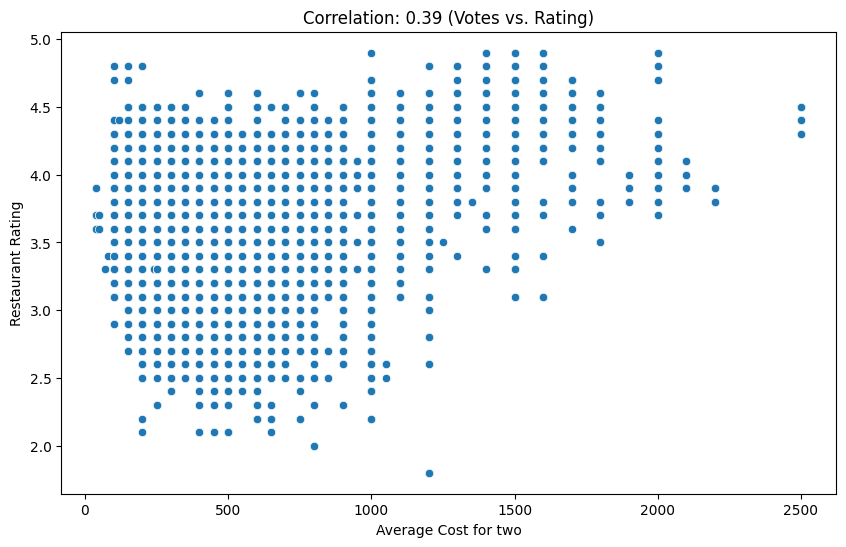

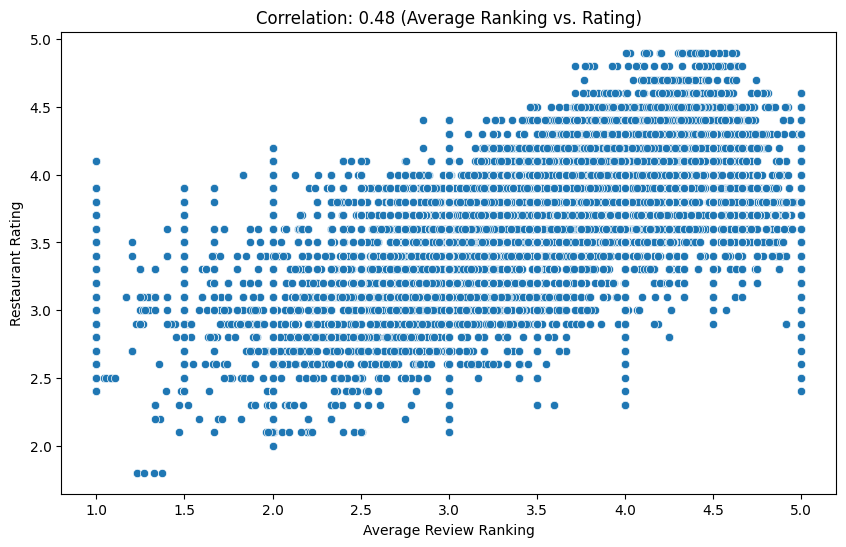

In [10]:
# To Calculate the correlation between 'votes' and 'rate'
correlation_votes_rate = data_set['ave_cost_for_two'].corr(data_set['rate'])

# To Calculate the correlation between 'ave_review_ranking' and 'rate'
correlation_ranking_rate = data_set['ave_review_ranking'].corr(data_set['rate'])

# Create a scatter plot to visualize the relationship between 'votes' and 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ave_cost_for_two', y='rate', data=data_set)
plt.xlabel('Average Cost for two')
plt.ylabel('Restaurant Rating')
plt.title(f'Correlation: {correlation_votes_rate:.2f} (Votes vs. Rating)')
plt.show()

# Create a scatter plot to visualize the relationship between 'ave_review_ranking' and 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ave_review_ranking', y='rate', data=data_set)
plt.xlabel('Average Review Ranking')
plt.ylabel('Restaurant Rating')
plt.title(f'Correlation: {correlation_ranking_rate:.2f} (Average Ranking vs. Rating)')
plt.show()

## QUESTION-4

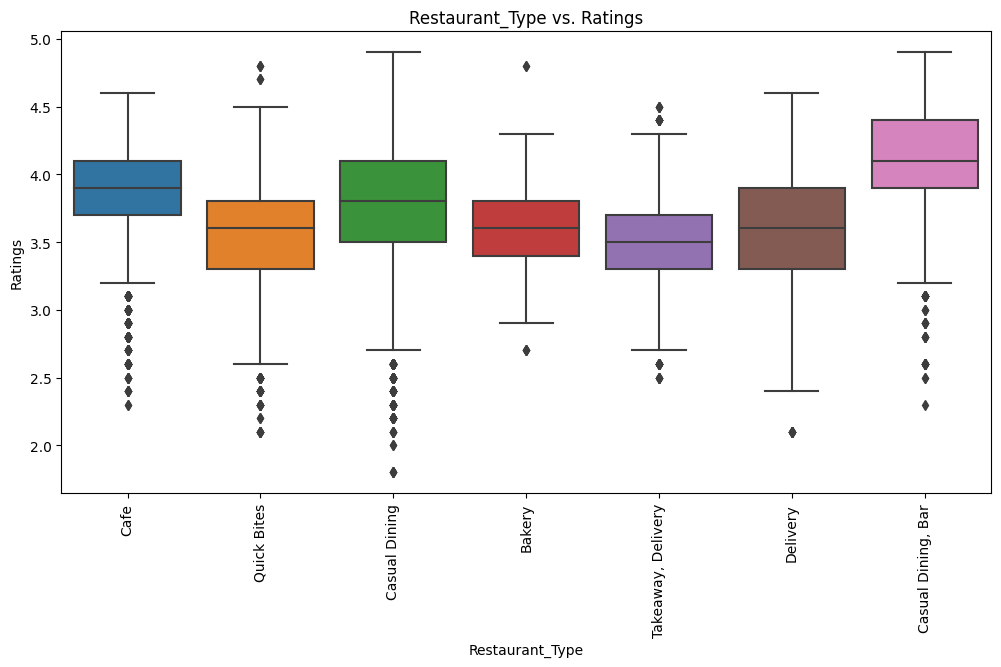

In [11]:
# 4. To identify how do ratings (rate) and average cost for two vary among the restaurant types?
plt.figure(figsize=(12, 6))
sns.boxplot(x='rest_type', y='rate', data=data_set)
plt.title('Restaurant_Type vs. Ratings')
plt.xticks(rotation=90)
plt.xlabel('Restaurant_Type')
plt.ylabel('Ratings')
plt.show()


## QUESTION-5

In [12]:
# 5. Additional insights on restaurants:

# To identify the best and worst performing restaurants:
best_restaurant = data_set[data_set['rate'] == data_set['rate'].max()]
worst_restaurant = data_set[data_set['rate'] == data_set['rate'].min()]
print(f"Best Performing Restaurant: {best_restaurant['name'].values[0]} with rating {best_restaurant['rate'].values[0]}")
print(f"Worst Performing Restaurant: {worst_restaurant['name'].values[0]} with rating {worst_restaurant['rate'].values[0]}")


Best Performing Restaurant: Asia Kitchen By Mainland China with rating 4.9
Worst Performing Restaurant: Alibi - Maya International Hotel with rating 1.8


In [13]:
# To identify the city with the most restaurants
city = data_set['listed_in_city'].value_counts().idxmax()
print(f"City with the maximum restaurants : {city}")



City with the maximum restaurants : BTM


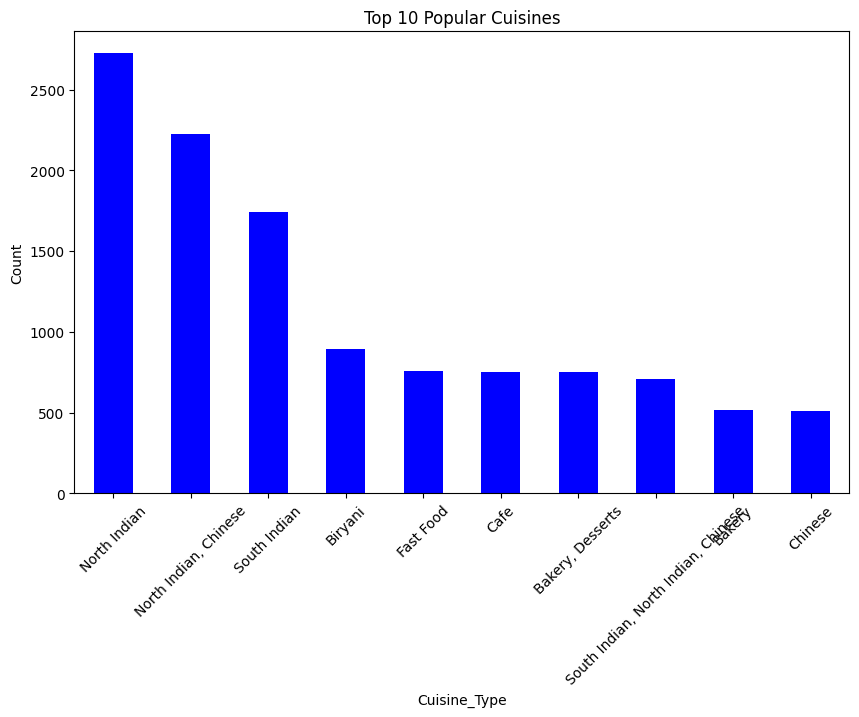

In [14]:
#To identify the top 10 cusines from data
count_of_cuisines = data_set['cuisines'].value_counts()
top_n = 10
top_cuisines = count_of_cuisines.head(top_n)

# Creating a bar chart
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='blue')
plt.title(f'Top {top_n} Popular Cuisines')
plt.xlabel('Cuisine_Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 2.3 Handling Missing data

In [15]:
# Inspecting missing data
print(data_set.isnull().sum().sort_values(ascending=0))

dish_liked            22779
rate                   8336
ave_review_ranking     6379
phone                   884
ave_cost_for_two        240
cuisines                 18
online_order              0
votes                     0
book_table                0
url                       0
listed_in_city            0
address                   0
menu_item                 0
rest_type                 0
location                  0
name                      0
listed_in_type            0
dtype: int64


## 2.4 Data Cleansing

In [16]:
# Dropping columns with high missings data
data_set.drop(columns=['phone', 'dish_liked'], inplace=True)

In [17]:
#Fill in missing numerical data with mean
data_set['ave_cost_for_two'].fillna(data_set['ave_cost_for_two'].mean(),inplace=True)
data_set['ave_review_ranking'].fillna(data_set['ave_review_ranking'].mean(),inplace=True)

In [18]:
# Using a custom value for empty rows on categorical data
data_set['cuisines'].fillna("Not provided", inplace=True)

In [19]:
# Removing empty rows from 'rate' column
data_set = data_set.dropna(subset=['rate'])

In [20]:
# Rechecking the missing data
print(data_set.isnull().sum().sort_values(ascending=0))

url                   0
address               0
name                  0
location              0
rest_type             0
cuisines              0
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two      0
votes                 0
ave_review_ranking    0
rate                  0
dtype: int64


## 2.5 Exploratory data analysis and Visualisation

### 2.5.1 Univariate Analysis

votes :

count    31794.000000
mean       284.311065
std        659.501790
min          0.000000
25%         20.000000
50%         68.000000
75%        244.000000
max      12121.000000
Name: votes, dtype: float64




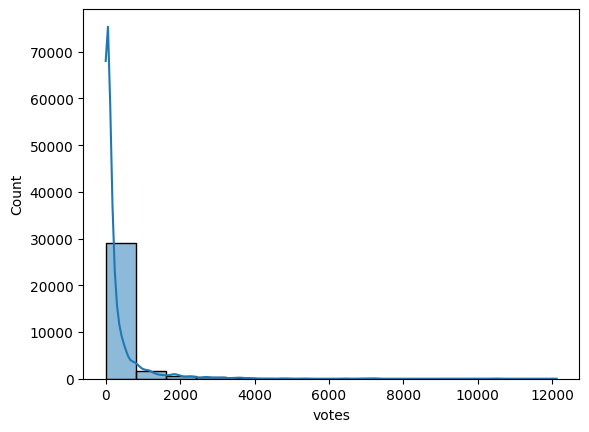

ave_cost_for_two :

count    31794.000000
mean       546.839911
std        338.909168
min         40.000000
25%        300.000000
50%        500.000000
75%        700.000000
max       2500.000000
Name: ave_cost_for_two, dtype: float64




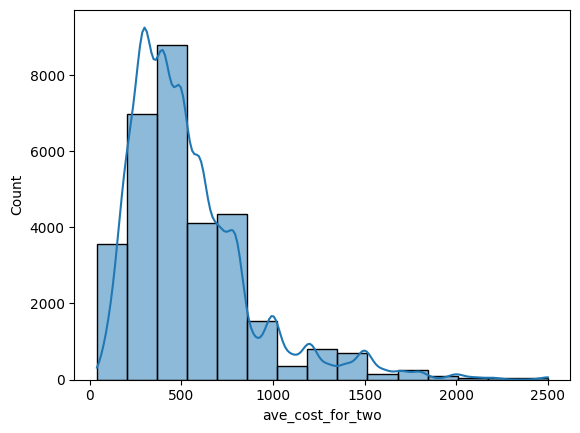

ave_review_ranking :

count    31794.000000
mean         3.587350
std          0.844570
min          1.000000
25%          3.000000
50%          3.666667
75%          4.078431
max          5.000000
Name: ave_review_ranking, dtype: float64




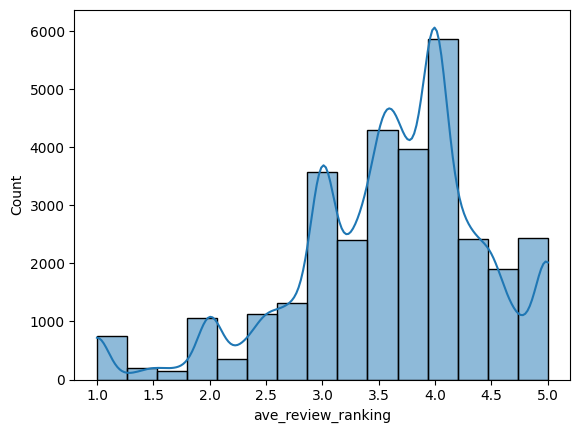

In [21]:
nums=['votes', 'ave_cost_for_two', 'ave_review_ranking']
for i in nums:
   print(i, ':\n')
   print(data_set[i].describe())
   print('\n')
   sns.histplot(data=data_set, x=i, bins = 15, kde=True)
   #sns.boxplot(x=records[i], showmeans=True)
   plt.show()

<Axes: xlabel='rate', ylabel='Count'>

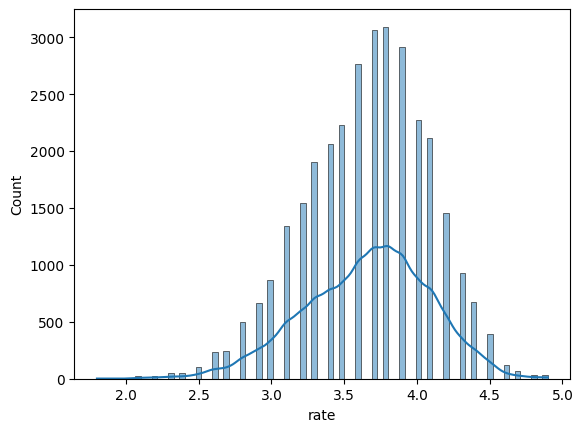

In [22]:
#Check data distribution of the variable with missing data
sns.histplot(data=data_set, x='rate', kde=True)

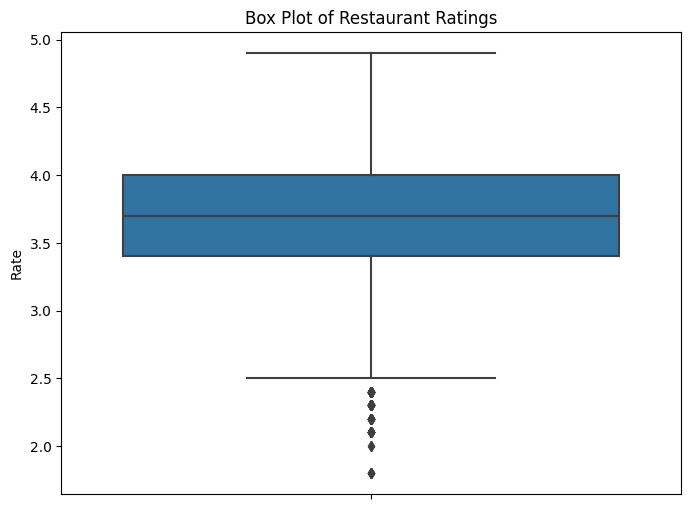

In [23]:
# Box plot of 'rate' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_set, y='rate')
plt.ylabel('Rate')
plt.title('Box Plot of Restaurant Ratings')
plt.show()



## Data Exploration

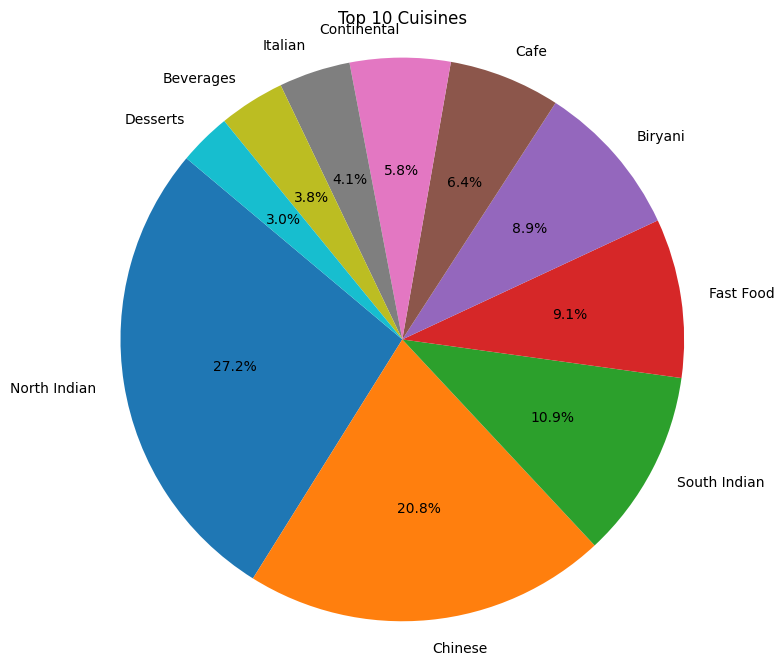

In [24]:
# Split the 'cuisines' column to get individual cuisine types
data_set['cuisine_list'] = data_set['cuisines'].str.split(', ')

# Flatten the list of cuisines and count their occurrences
cuisine_counts = data_set['cuisine_list'].explode().value_counts()

# Get the top N cuisines (you can change N as needed)
top_n = 10  # For example, get the top 5 cuisines
top_cuisines = cuisine_counts.head(top_n)

# Create a pie chart to visualize the distribution of cuisines
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Cuisines')
plt.axis('equal')
# Show the pie chart
plt.show()

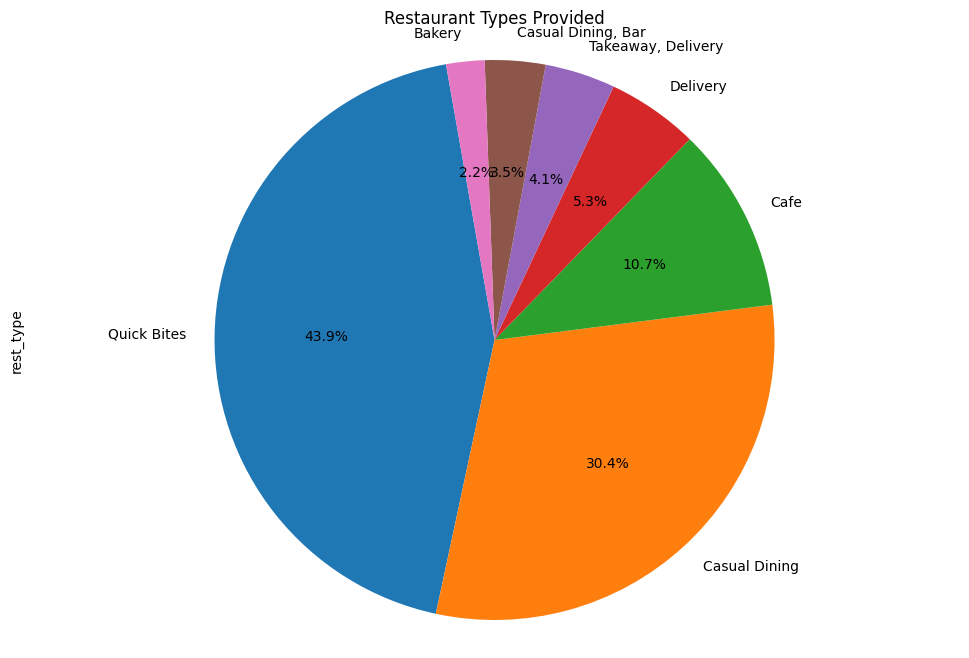

In [25]:
# To visualise the restaurant types
plt.figure(figsize=(12, 8))
data_set['rest_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=100)
plt.title("Restaurant Types Provided")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

### 2.5.2 Bivariate Analysis

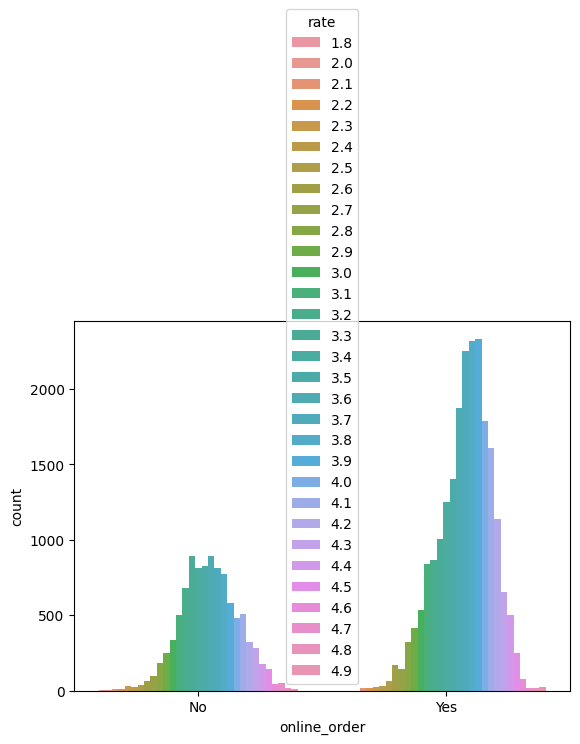

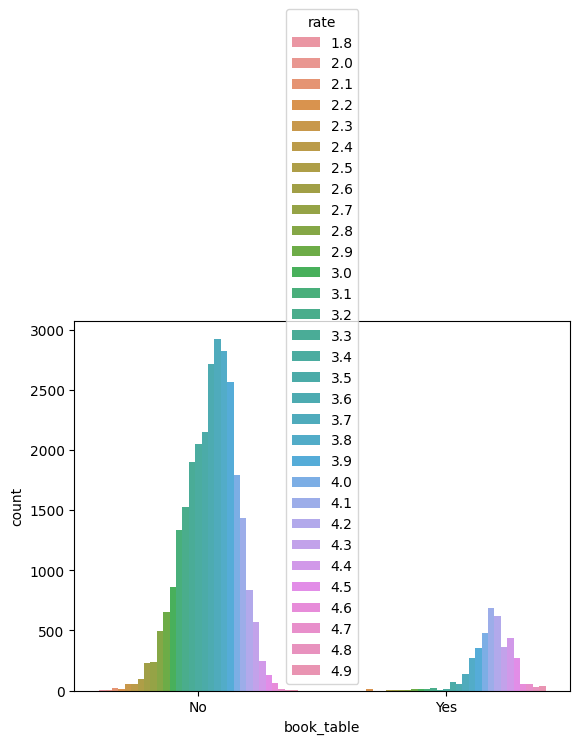

In [26]:
#explore relationships between each categorical variable and the target one
cats=['online_order','book_table']
for i in cats:
   plt.figure()
   sns.countplot(x=data_set[i], hue=data_set['rate'])

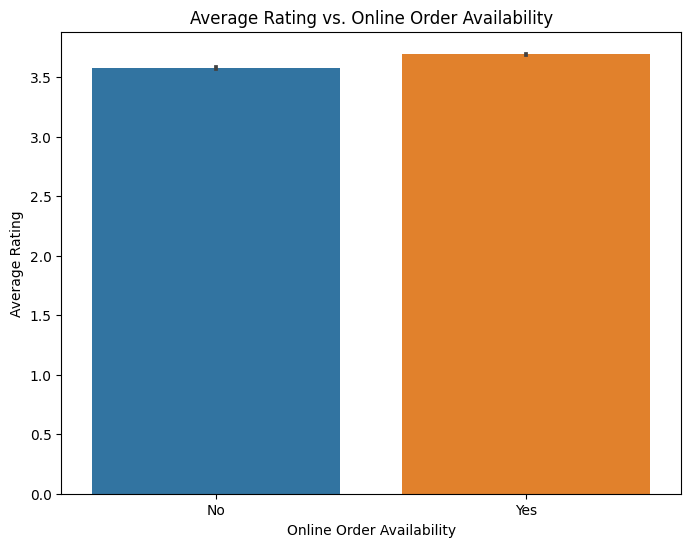

In [27]:
# Create a bar plot to compare ratings for restaurants with and without online ordering
plt.figure(figsize=(8, 6))
sns.barplot(x='online_order', y='rate', data=data_set)
plt.xlabel('Online Order Availability')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Online Order Availability')
plt.show()

### 2.5.3 Multivariate Analysis

In [28]:
# Converting catergorical variables into numerical variables
data_set['online_order'] = data_set['online_order'].map({'Yes': 1, 'No': 0})
data_set['book_table'] = data_set['book_table'].map({'Yes': 1, 'No': 0})

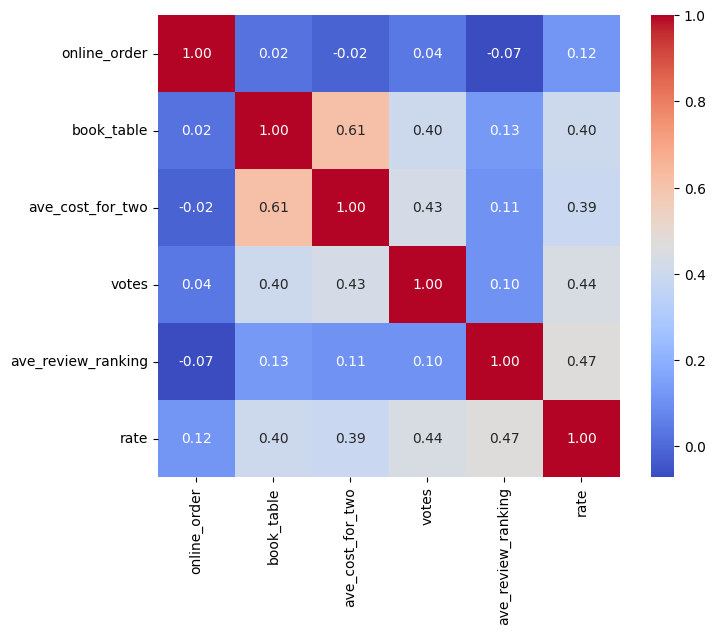

In [29]:
selected_columns = data_set[['online_order','book_table','ave_cost_for_two','votes','ave_review_ranking','rate']]

corr_matrix = selected_columns.corr()

# Making heatmap of  selected_columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm',fmt=".2f")
plt.show()

## 3. Machine Learning Model Development

In [30]:
# Features Selection
X = data_set[['online_order', 'book_table', 'ave_cost_for_two', 'ave_review_ranking' ,'votes']]
y = data_set['rate']


In [31]:
# Spliting dataset 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 3.1 Supervised Machine Learning 1 - Random Forest Regression

In [32]:
# Model 1: Random Forest Regressor Metric
RF_Regression = RandomForestRegressor()
RF_Regression.fit(X_train, y_train)
y_pred_rf = RF_Regression.predict(X_test)

In [33]:
# Model Evaluation of Random Forest Regression
RF_MAE = mean_absolute_error(y_test, y_pred_rf)
RF_Regression_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_rf))
RF_R2 = r2_score(y_test, y_pred_rf)

In [34]:
print("\nRandom Forest Regressor Metrics:")
print("MAE:", RF_MAE)
print("RMSE:", RF_Regression_RMSE)
print("R-squared:", RF_R2)


Random Forest Regressor Metrics:
MAE: 0.08353307973267265
RMSE: 0.15789555829505952
R-squared: 0.8667665700456935


### 3.2 Supervised Machine Learning 2 - kNN Regression

In [35]:
# Model 2: kNN Regression Metric
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)


In [36]:
# Model Evaluation of kNN Regression
kNN_MAE = mean_absolute_error(y_test, y_pred)
kNN_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
kNN_R2 = r2_score(y_test, y_pred)

In [37]:
print("Linear Regression Metrics:")
print("MAE:", kNN_MAE)
print("RMSE:", kNN_RMSE)
print("R-squared:", kNN_R2)

Linear Regression Metrics:
MAE: 0.13646923157563684
RMSE: 0.23694238118424066
R-squared: 0.6999740086726245


## 4. Unsupervised Machine Learning Model - Clustering

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [39]:
# Defining the numeric features
Features_to_scale = ['ave_cost_for_two', 'ave_review_ranking']
X = data_set[Features_to_scale]
scaler = MinMaxScaler()
X_scaled_values = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_values, columns=Features_to_scale)


In [40]:
# Specifying the number of clusters (k)
k = 5
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)

# Fitting k-means with X_scaled
kmeans.fit(X_scaled)

# Adding cluster labels to the original dataset
data_set['Cluster'] = kmeans.labels_

In [41]:
# Printing cluster sizes
print("Cluster Sizes:")
print(data_set['Cluster'].value_counts())

# Evaluating the model
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Computing the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Computing the Silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette score:', '%.3f' % silhouette_avg)

Cluster Sizes:
4    12401
2     8048
1     5319
0     3553
3     2473
Name: Cluster, dtype: int64
Within-Cluster Sum of Squares (WCSS): 417.314
Davies Bouldin index: 0.800
Silhouette score: 0.393


In [42]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [43]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

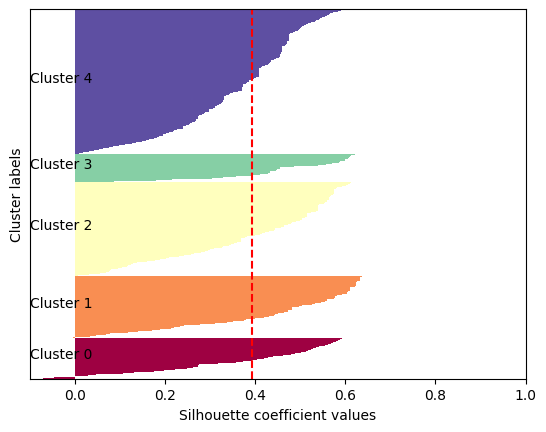

In [44]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

## Optimising K

###Use the elbow method based on the SSE (WCSS) score

In [45]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  52.381


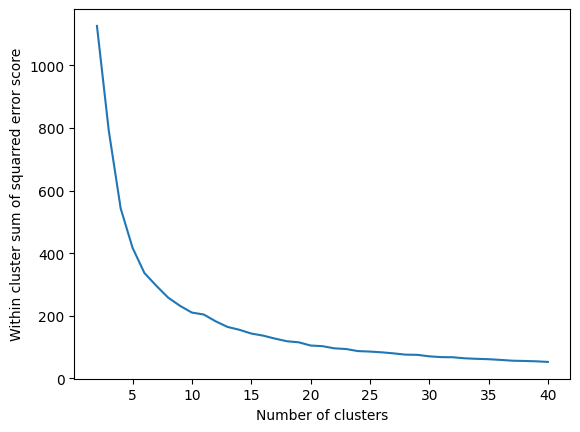

In [46]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

##Optimise the number of clusters based on the silhouette score

In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [ ]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled['ave_cost_for_two'], X_scaled['ave_review_ranking'], c=data_set['Cluster'], cmap='rainbow')
plt.xlabel('Scaled Average Cost for Two')
plt.ylabel('Scaled Average Review Ranking')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=2023)
cluster_labels = kmeans.fit_predict(X_scaled)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot the silhouette diagram
fig, ax = plt.subplots()
n_clusters = len(np.unique(cluster_labels))
y_lower, y_upper = 0, 0

cmap = cm.get_cmap("Spectral")

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()